In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import datetime
import matplotlib.dates as mdates

# Part 1

### * First, you will prepare the dataset for time series analysis

In [2]:
Zillow_Home_Value_Index_df = pd.read_csv('C:/Users/Dell/Downloads/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
Zillow_Home_Value_Index_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


### * Filter the 4 largest cities into a new dataframe

In [3]:
Zillow_Home_Value_Index_df=Zillow_Home_Value_Index_df.sort_values(by='SizeRank', ascending=True)
Zillow_Home_Value_Index_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [4]:
df_largest_cities = Zillow_Home_Value_Index_df.loc[0:3]
df_largest_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


### * Melt the data to long-form and prepare it for time series analysis

In [5]:
df_largest_cities.dtypes

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName      object
               ...   
2022-05-31    float64
2022-06-30    float64
2022-07-31    float64
2022-08-31    float64
2022-09-30    float64
Length: 281, dtype: object

In [6]:
df_largest_cities.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [7]:
id_cols=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'Metro', 'CountyName']
melted = pd.melt(df_largest_cities, id_vars = id_cols, value_name = "Typical Home Value", var_name= 'Date')

In [8]:
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Typical Home Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [9]:
melted.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', 'Date', 'Typical Home Value'],
      dtype='object')

In [10]:
melted['Date'] = pd.to_datetime(melted['Date'])

In [11]:
melted=melted.set_index("Date")

In [12]:
resampled_df = melted.resample("MS").mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_7308\2163906913.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = melted.resample("MS").mean()


In [13]:
resampled_df.head(2)

,RegionID,SizeRank,Typical Home Value
Date,,,
2000-01-01,18776.25,1.5,190769.50
2000-02-01,18776.25,1.5,191383.25


# Part 2 

### Plot the home values for all 4 cities.

In [14]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
fmt_thous = mticks.FuncFormatter(thousands)

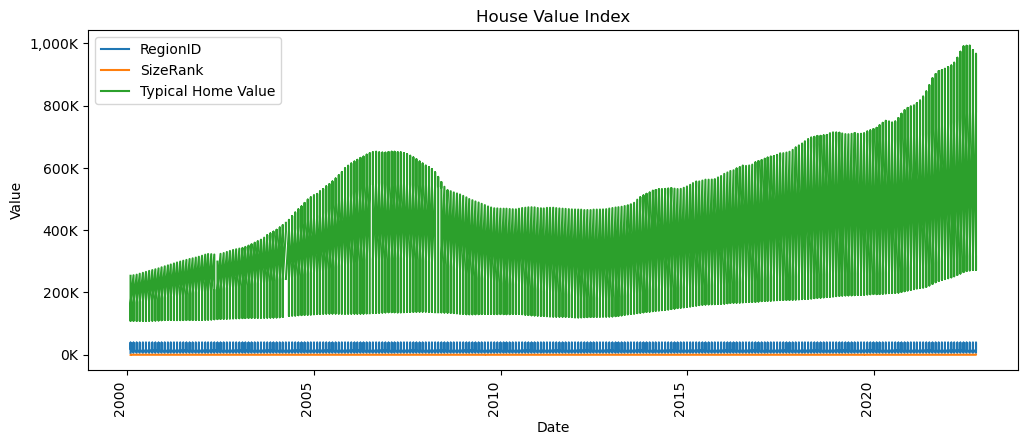

In [15]:
ax = melted.plot(figsize=(12,5))
ax.set(title='House Value Index', ylabel='Value')

# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)



ax.yaxis.set_major_formatter(fmt_thous)


## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

### Answer the following 2 questions using pandas

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [17]:
resampled_df

,RegionID,SizeRank,Typical Home Value
Date,,,
2000-01-01,18776.25,1.5,190769.50
2000-02-01,18776.25,1.5,191383.25
2000-03-01,18776.25,1.5,192241.50
2000-04-01,18776.25,1.5,193901.50
2000-05-01,18776.25,1.5,195662.50
...,...,...,...
2022-05-01,18776.25,1.5,584308.25
2022-06-01,18776.25,1.5,587461.25
2022-07-01,18776.25,1.5,589322.75


In [23]:
df_2008 = resampled_df.loc['2008-06-01': '2008-12-31' ]
df_2008

,RegionID,SizeRank,Typical Home Value
Date,,,
2008-06-01,18776.25,1.5,374425.00
2008-07-01,18776.25,1.5,369249.25
2008-08-01,18776.25,1.5,363444.75
2008-09-01,18776.25,1.5,359024.50
2008-10-01,18776.25,1.5,354266.25
2008-11-01,18776.25,1.5,349994.50
2008-12-01,18776.25,1.5,344048.00


In [25]:
print('the highest Typical Home Value at the end of 2008: ',df_2008['Typical Home Value'].max())
print('the least Typical Home Value at the end of 2008: ',df_2008['Typical Home Value'].min())

the highest Typical Home Value at the end of 2008:  374425.0
the least Typical Home Value at the end of 2008:  344048.0


2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [26]:
df_plot = resampled_df.loc['2008-11-01': '2008-12-31' ]
df_plot

,RegionID,SizeRank,Typical Home Value
Date,,,
2008-11-01,18776.25,1.5,349994.5
2008-12-01,18776.25,1.5,344048.0


In [28]:
df_plot['Typical Home Value'].diff()

Date
2008-11-01       NaN
2008-12-01   -5946.5
Freq: MS, Name: Typical Home Value, dtype: float64